In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter
import seaborn as sns
import os
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/rayan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rayan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rayan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
train=pd.read_csv('Train.csv', encoding='ISO-8859-1')
test=pd.read_csv('Test.csv', encoding='ISO-8859-1')
tag=pd.read_csv('Tags.csv', encoding='ISO-8859-1')

In [3]:
train.head(5)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(5)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


# Nettoyage initial

In [5]:
def clean_text(text):

    
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Suppression des espaces blancs supplémentaires
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text.lower()

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

train_df['cleaned_text'] = train_df['ABSTRACT'].apply(clean_text)
test_df['cleaned_text'] = test_df['ABSTRACT'].apply(clean_text)

train_df.to_csv('train_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv', index=False)

print("Nettoyage terminé et fichiers sauvegardés.")



Nettoyage terminé et fichiers sauvegardés.


# Suppresion des Stopword

In [6]:
def remove_stopwords(text):
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

train_df['cleaned_text'] = train_df['ABSTRACT'].apply(clean_text)
test_df['cleaned_text'] = test_df['ABSTRACT'].apply(clean_text)

train_df['text_without_stopwords'] = train_df['cleaned_text'].apply(remove_stopwords)
test_df['text_without_stopwords'] = test_df['cleaned_text'].apply(remove_stopwords)

train_df.to_csv('train_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv', index=False)

print("Nettoyage et suppression des stop words terminés. Fichiers sauvegardés.")


Nettoyage et suppression des stop words terminés. Fichiers sauvegardés.


# Tokenisation

In [7]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_cleaned.csv')

train_df['tokens'] = train_df['text_without_stopwords'].apply(tokenize_text)
test_df['tokens'] = test_df['text_without_stopwords'].apply(tokenize_text)

train_df.to_csv('train_tokens.csv', index=False)
test_df.to_csv('test_tokens.csv', index=False)

print("Tokenisation terminée et fichiers sauvegardés.")


Tokenisation terminée et fichiers sauvegardés.


# Stemmatisation

In [8]:
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

train_df = pd.read_csv('train_tokens.csv')
test_df = pd.read_csv('test_tokens.csv')

train_df['stemmed_text'] = train_df['tokens'].apply(stem_tokens)
test_df['stemmed_text'] = test_df['tokens'].apply(stem_tokens)

train_df.to_csv('train_stemmed.csv', index=False)
test_df.to_csv('test_stemmed.csv', index=False)

print("Stemming terminé et fichiers sauvegardés.")


Stemming terminé et fichiers sauvegardés.


# Lemmatisation

In [9]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

train_df = pd.read_csv('train_tokens.csv')
test_df = pd.read_csv('test_tokens.csv')

train_df['lemmatized_tokens'] = train_df['tokens'].apply(lemmatize_tokens)
test_df['lemmatized_tokens'] = test_df['tokens'].apply(lemmatize_tokens)

train_df.to_csv('train_lemmatized.csv', index=False)
test_df.to_csv('test_lemmatized.csv', index=False)

print("Lemmatisation terminée et fichiers sauvegardés.")

Lemmatisation terminée et fichiers sauvegardés.


# Visualisation

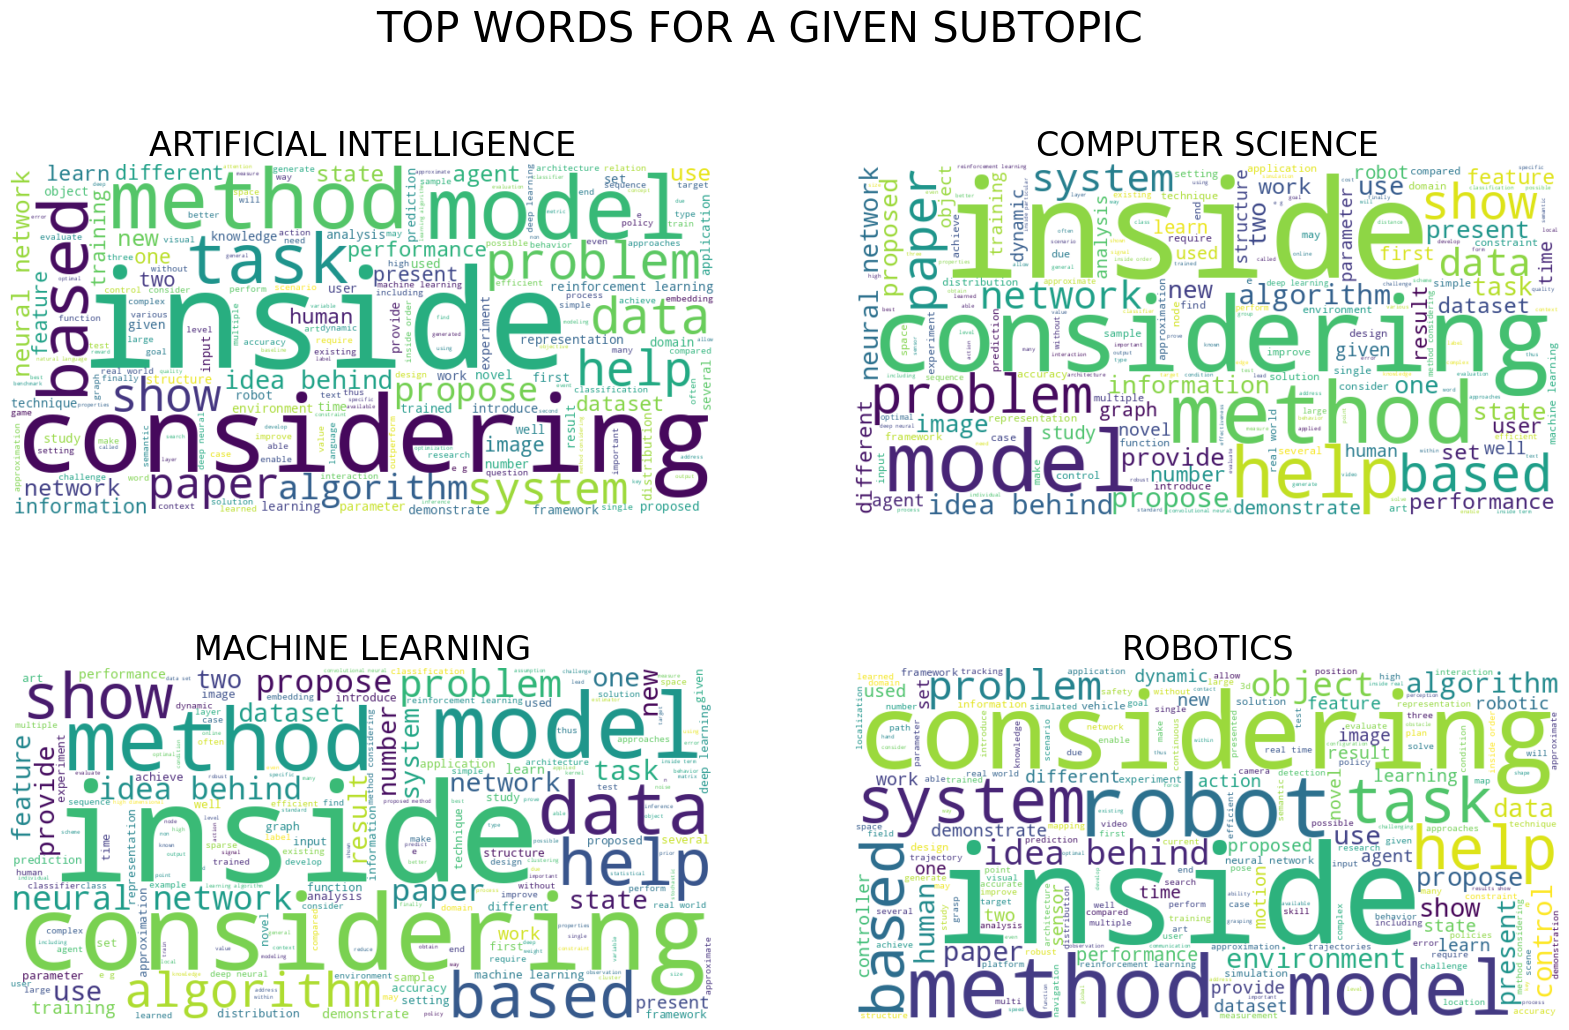

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sub_topics = [
    'Artificial Intelligence', 
    'Computer Science', 
    'Machine Learning', 
    'Robotics'
]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, sub_topic_name in enumerate(sub_topics):
    sub_topic = train[train[sub_topic_name] == 1]
    
    op = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sub_topic['ABSTRACT'].astype(str)))
    
    axes[i].imshow(op, interpolation='bilinear')
    axes[i].set_title(sub_topic_name.upper(), fontsize=24)
    axes[i].axis('off')

plt.suptitle('TOP WORDS FOR A GIVEN SUBTOPIC', fontsize=30)

plt.show()



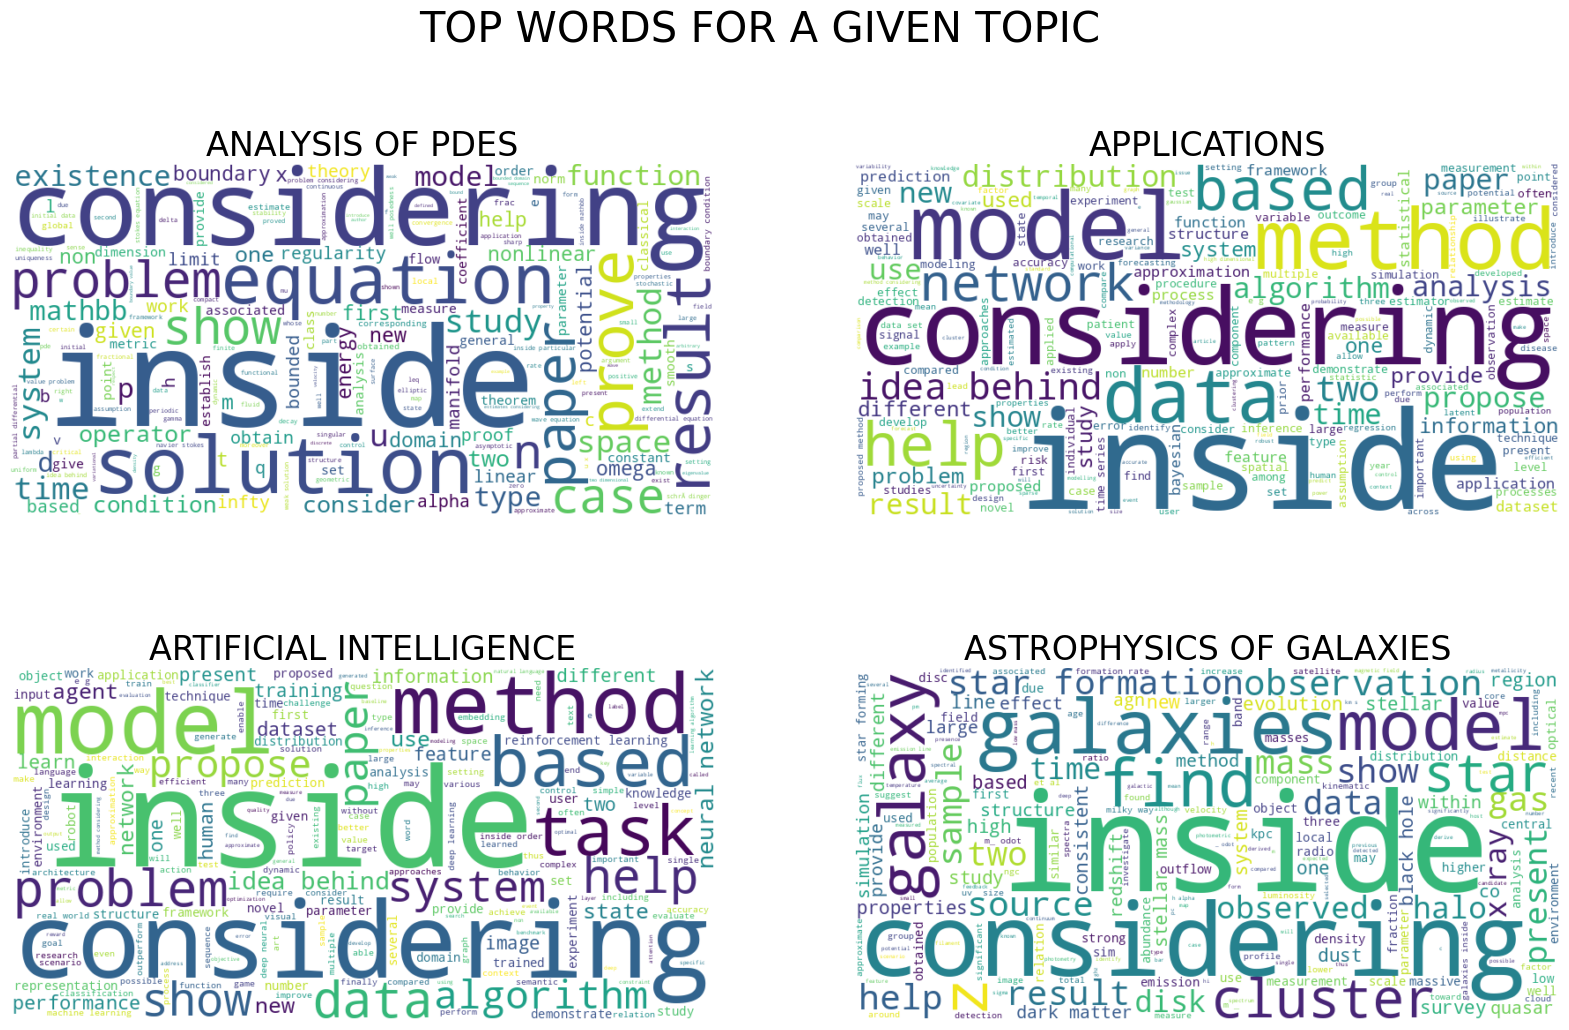

In [11]:
sub_topics = tag['Tags'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, sub_topic_name in enumerate(sub_topics[:4]):
    sub_topic = train[train[sub_topic_name] == 1]
    
    op = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sub_topic['ABSTRACT'].astype(str)))
    
    axes[i].imshow(op, interpolation='bilinear')
    axes[i].set_title(sub_topic_name.upper(), fontsize=24)
    axes[i].axis('off')

plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

plt.show()




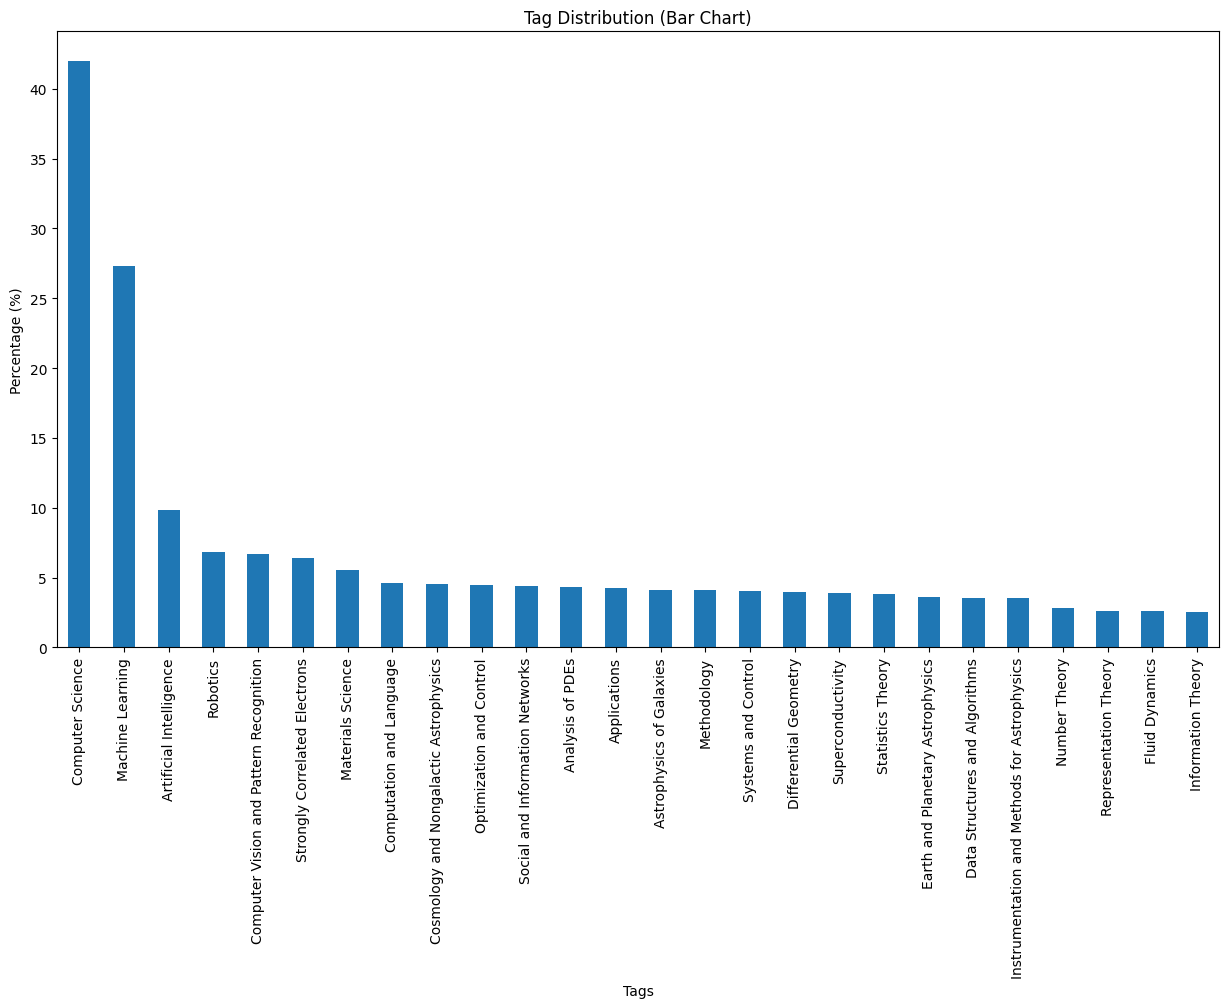

In [12]:
data = train

tag = [
    'Computer Science', 'Analysis of PDEs', 'Applications',
    'Artificial Intelligence', 'Astrophysics of Galaxies',
    'Computation and Language', 'Computer Vision and Pattern Recognition',
    'Cosmology and Nongalactic Astrophysics', 'Data Structures and Algorithms',
    'Differential Geometry', 'Earth and Planetary Astrophysics', 'Fluid Dynamics',
    'Information Theory', 'Instrumentation and Methods for Astrophysics',
    'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
    'Optimization and Control', 'Representation Theory', 'Robotics',
    'Social and Information Networks', 'Statistics Theory',
    'Strongly Correlated Electrons', 'Superconductivity', 'Systems and Control'
]

missing_cols = [col for col in tag if col not in data.columns]
if missing_cols:
    raise ValueError(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_cols}")

tag_distribution = 100 * (data[tag].sum() / data.shape[0])
tag_distribution = tag_distribution.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
tag_distribution.plot(kind='bar', width=0.5)
plt.xticks(rotation=90)
plt.title("Tag Distribution (Bar Chart)")
plt.xlabel('Tags')
plt.ylabel('Percentage (%)')
plt.show()


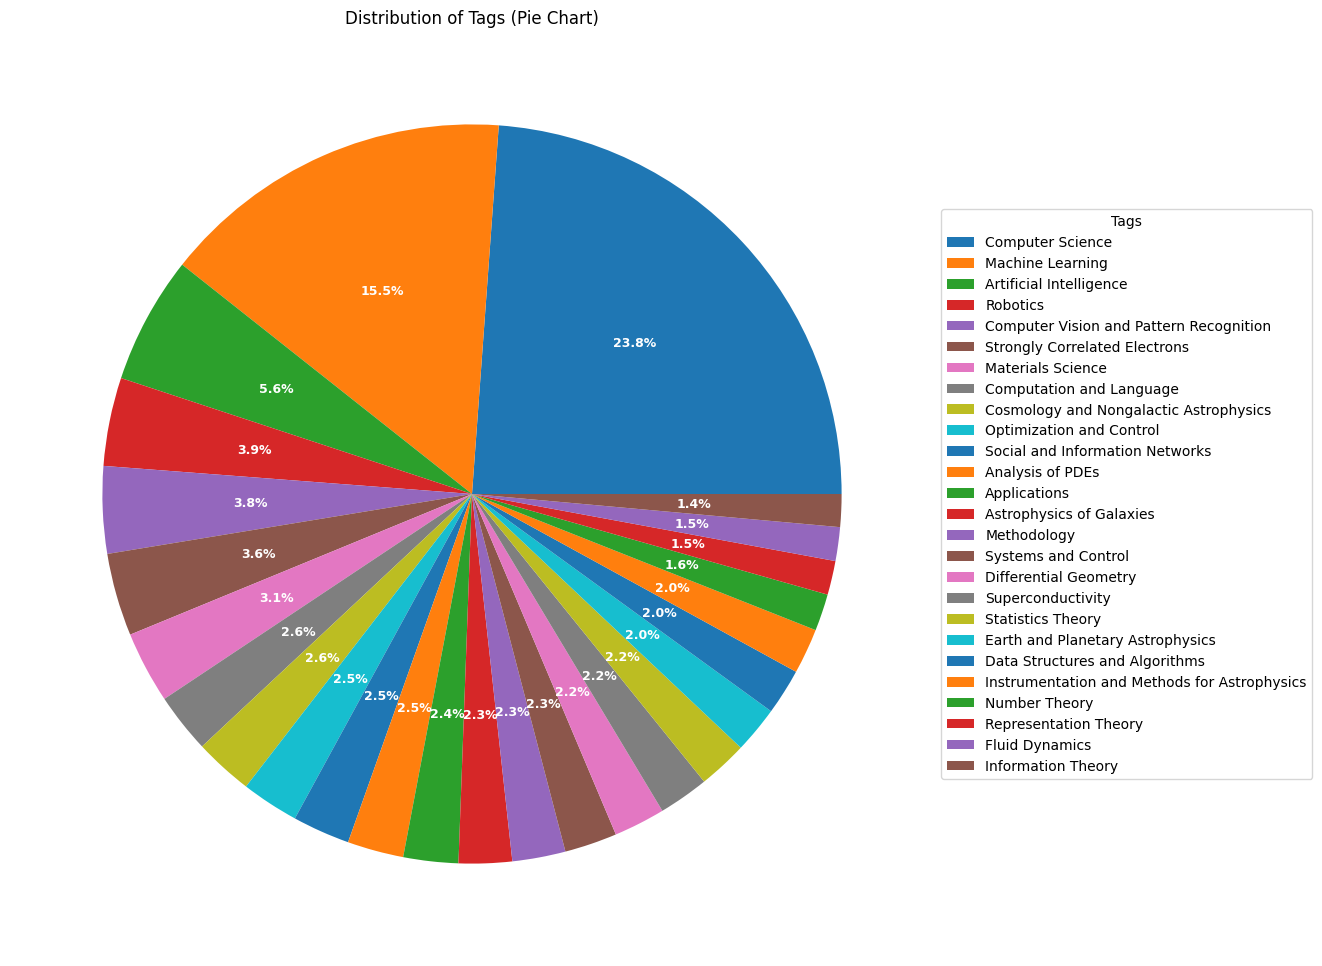

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

data = train

tag = [
    'Computer Science', 'Analysis of PDEs', 'Applications',
    'Artificial Intelligence', 'Astrophysics of Galaxies',
    'Computation and Language', 'Computer Vision and Pattern Recognition',
    'Cosmology and Nongalactic Astrophysics', 'Data Structures and Algorithms',
    'Differential Geometry', 'Earth and Planetary Astrophysics', 'Fluid Dynamics',
    'Information Theory', 'Instrumentation and Methods for Astrophysics',
    'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
    'Optimization and Control', 'Representation Theory', 'Robotics',
    'Social and Information Networks', 'Statistics Theory',
    'Strongly Correlated Electrons', 'Superconductivity', 'Systems and Control'
]

missing_cols = [col for col in tag if col not in data.columns]
if missing_cols:
    raise ValueError(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_cols}")

tag_distribution = 100 * (data[tag].sum() / data.shape[0])
tag_distribution = tag_distribution.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(tag_distribution, autopct=lambda pct: f"{pct:.1f}%",
                                  textprops=dict(color="w"))

ax.legend(wedges, tag_distribution.index,
          title="Tags", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")
ax.set_title("Distribution of Tags (Pie Chart)")
plt.show()
